# Лабораторная работа "Построение эллипса Петунина"


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
%matplotlib inline
np.random.seed(20)

## Создание набора точек

Будем генерировать точки случайным образом

### Обозначим границы области для генерации точек и количество точек

In [2]:
x_limits = [-10,10]
y_limits = [-5,5]
N = 10


### Используем функцию для создания набора данных

In [3]:
def random_data(x_limits, y_limits,N):
    """
    Функция создает массив точек на плоскости в заданных ограничениях 
    с равномерным распределением
    ограничения (x_limits, y_limits) заданы в виде (x_min, x_max)
    Размер выходного массива (2,N)
    """
    return np.vstack((np.random.uniform(x_limits[0],x_limits[1], N),
            np.random.uniform(y_limits[0],y_limits[1], N)))

In [4]:
data = random_data(x_limits, y_limits, N)

### Рисунок полученных точек

In [5]:
def first_pic(data, x_limits, y_limits, size=7, title = ""):
    """
    Рисует только полученные точки
    """
    figsize = np.array((abs(x_limits[0] - x_limits[1]), abs(y_limits[0] - y_limits[1])))
    figsize = figsize*(size/np.max(figsize))
    fig, ax = plt.subplots(figsize = figsize)
    ax.set_title(title)
    ax.set_xlim(*x_limits)
    ax.set_ylim(*y_limits)
    ax.axis("equal")
    ax.scatter(data[0],data[1])
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    return fig

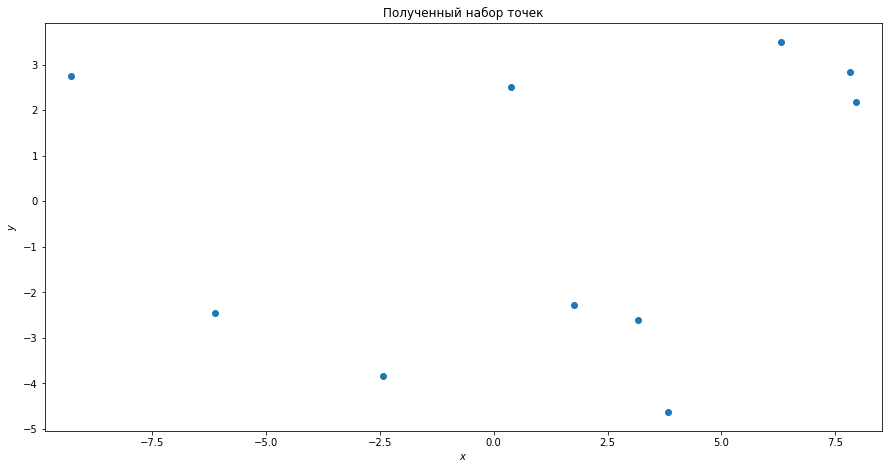

In [6]:
_= first_pic(data, x_limits, y_limits,size = 15, title= "Полученный набор точек")

## Определение 2 наиболее отдаленных точек

Найдем 2 наиболее отдаленные точки и будем считать, что главная ось эллипсов Петунина лежит на прямой, что соединяет найденные точки.

In [7]:
def distance(dot1, dot2):
    """
    функция расстояния между точками
    """
    return np.sqrt(np.sum((dot1- dot2)**2))


In [8]:
def max_distance(data):
    """
    Функция ищет индексы точек, между которыми максимальное расстояние
    """
    max_val = 0
    index = [0,0]
    # транспонируем данные для удобного обращения к точкам
    for in1, dot1 in enumerate(data.T):
        for in2, dot2 in enumerate(data.T):
            if distance(dot1, dot2)> max_val:
                max_val = distance(dot1, dot2)
                index = [in1, in2]
    # сортируем индексы по х
    return sorted(index, key = lambda ind: data[0,ind])

Запишем индексы точек между которыми наибольшее растояние

In [9]:
index_max = max_distance(data)

### Нарисуем полученный отрезок, что соединяет 2 наиболее отдаленные точки

In [10]:
def second_pic(data, x_limits, y_limits, index_max,  size =7, title = ""):
    """
    Рисует полученные точки и отрезок, котрый соединяет самые отдаленные точки
    """
    fig= first_pic(data, x_limits, y_limits, size , title)
    ax = fig.axes[0]
    ax.plot([data[0,index_max[0]], data[0,index_max[1]]], [data[1,index_max[0]], data[1,index_max[1]]])
    return fig

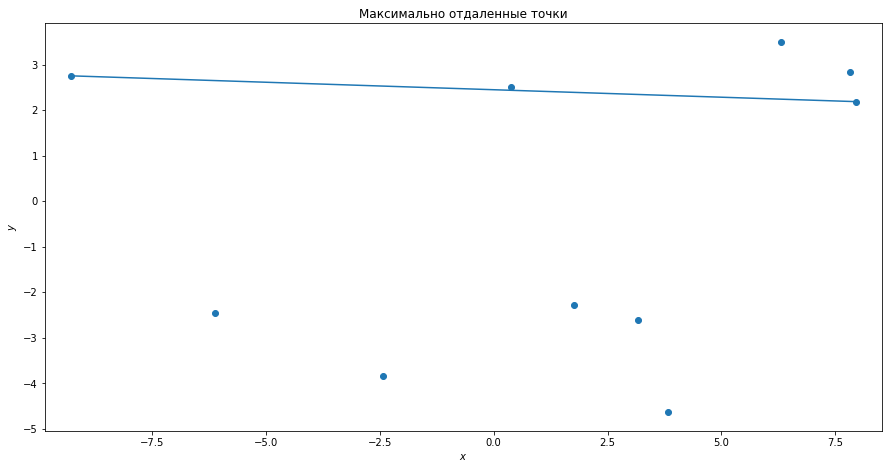

In [11]:
_ = second_pic(data, x_limits, y_limits, index_max, size=15, title= "Максимально отдаленные точки")

## Разворот точек

Для удобства построения эллипсов и поиска точек, что образуют максимальные перпендикуляры к проведенному отрезку, проведем разворот точек так, чтобы полученный отрезок был горизонтальным.

In [12]:
def rotate_point (point, center, angle):
    """
    Поворот точек point (хранятся в виде (2,N)) относительно center на угол angle
    angle в радианах и angle лежит в (-pi/2 , pi/2)
    """
    ox = (point[0] - center[0])*np.cos(angle) - (point[1]- center[1])*np.sin(angle) + center[0]
    oy = (point[0] - center[0])*np.sin(angle) + (point[1]- center[1])*np.cos(angle) + center[1]
    return np.vstack((ox,oy))

In [13]:
def find_angle(data, index_max):
    """
    Функция ищет угол наклона [-pi/2, pi/2] отрезка порожденного индексами index_max
    """
    return np.arctan((data[1,index_max[1]] -data[1,index_max[0]])/ (data[0,index_max[1]] -data[0,index_max[0]]))

Находим угол, который образует отрезок.

In [14]:
angle = find_angle(data, index_max)

Делаем поворот на найденный угол в обратную сторону.

### И в итоге получаем развернутый набор данных (*rdata*)

In [15]:
# умножаем угол на -1
rdata = rotate_point(data, data[:,index_max[0]], -1*angle)

### Поиск перпендикуляров

Ищем точки, с максимальным и минимальным значением по оси *y*. Проводим из этих точек перпендикуляры на отрезок.

In [16]:
def vertical_segments(rdata):
    """
    Функция находит индексы точек с имнимальным и максимальным значениями по оси y 
    """
    return [np.argmin(rdata,axis=1)[1], np.argmax(rdata,axis=1)[1]]

Находим индексы точек из которых проведем перпендикуляры.

In [17]:
v_index = vertical_segments(rdata)

Строим перпендикуляры

In [18]:
def vertical_perpendiculars(rdata, index_max, v_index):
    """
    Функция возвращает 2 отрезка, перпендикуляры максимальной длины, к горизонтальному отрезку,
    который задан индексами index_max
    """
    seg1 = np.array([rdata.T[v_index[0]], [rdata.T[v_index[0],0], rdata.T[index_max[0],1]]]).T
    seg2 = np.array([rdata.T[v_index[1]], [rdata.T[v_index[1],0], rdata.T[index_max[0],1]]]).T
    return seg1, seg2

In [19]:
segments = np.array(vertical_perpendiculars(rdata, index_max, v_index))

### Рисунок повернутых точек и перпендикуляров

В данном случае границы рисунка подстраиваются самостоятельно под расположение точек.

In [20]:
def third_pic(rdata, index_max,v_index, segments, size = 7, title= ""):
    """
    Повернутый график с максимальными вертикальными отрезками
    """
    new_y_limits = rdata[1,v_index[0]]*1.1, rdata[1,v_index[1]]*1.1
    new_x_limits = rdata[0,index_max[0]]*1.1, rdata[0,index_max[1]]*1.1
    fig = second_pic(rdata, new_x_limits, new_y_limits,index_max, size, title )
    ax = fig.axes[0]
    ax.plot(segments[0][0], segments[0][1], color ='red')
    ax.plot(segments[1][0], segments[1][1], color ='red')
    return fig

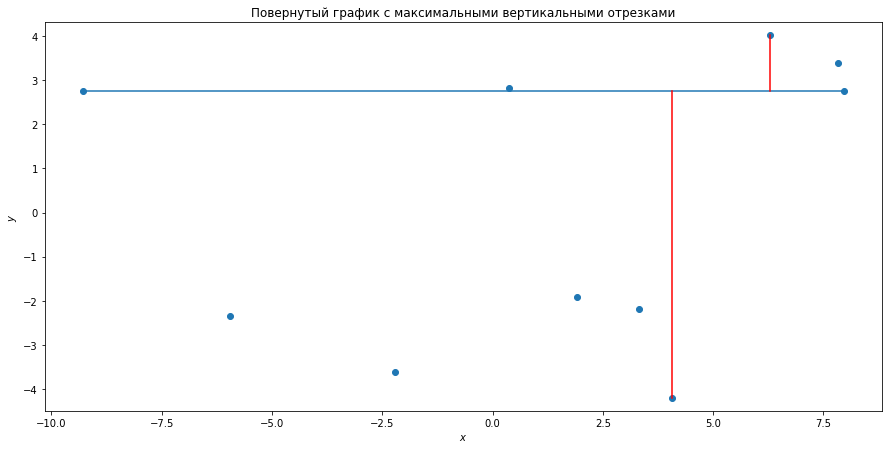

In [21]:
_= third_pic(rdata,index_max,v_index, segments, size = 15,title=
          "Повернутый график с максимальными вертикальными отрезками")

## Сжатие\Растяжение данных

Сожмем\растянем данные по оси *x* относительно левой точки горизонтального отрезка. Коэффициент сжатия\растяжения выбирается так, чтобы сумма длин вертикальных перпендикуляров была равна длине горизонтального отрезка.

In [22]:
def compression_ratio(rdata, index_max, v_index):
    """
    находит коэффициент сжатия/растяжения по x для получения квадрата,
    а именно равенства отрезков, что были получены из index_max, v_index
    """
    x_length = np.abs(rdata[0,index_max[1]] - rdata[0,index_max[0]])
    y_length = np.abs(rdata[1,v_index[1]] - rdata[1,v_index[0]])
    return y_length/ x_length

Находим коефициент растяжения\сжатия

In [23]:
koef = compression_ratio(rdata, index_max, v_index)

In [24]:
def make_square_data(rdata, index_max, segments, koef):
    """
    Функция изменяет данные, сжимает или растягивает по координате x для получения квадрата,
    а именно равенства отрезков, что были получены из index_max, v_index
    """
    s_rdata = rdata.copy()
    s_rdata[0]= s_rdata[0,index_max[0]] +  (s_rdata[0] - s_rdata[0,index_max[0]])* koef
    s_segments= segments.copy()
    for i in range(len(s_segments)):
        s_segments[i][0]= s_rdata[0,index_max[0]] +  (s_segments[i][0] - s_rdata[0,index_max[0]])* koef
    return s_rdata, s_segments

### Получем набор сжатых данных и новые точки перпендикуляров

In [25]:
s_rdata, s_segments = make_square_data(rdata, index_max, segments, koef)

### Рисунок сжатых данных

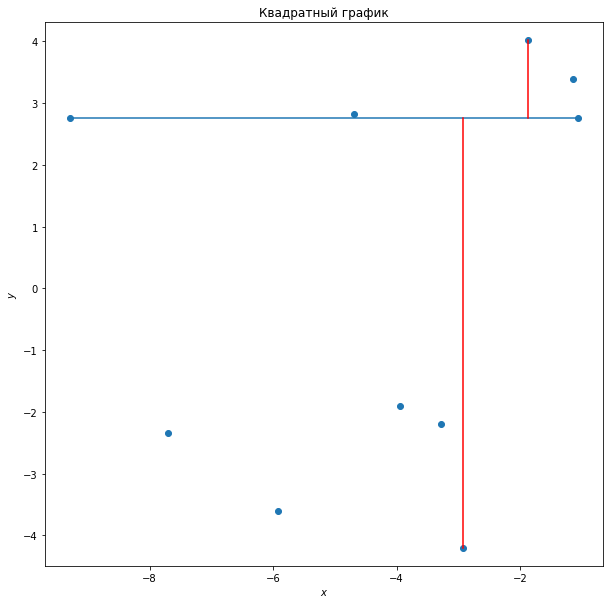

In [26]:
_ = third_pic(s_rdata,index_max,v_index, s_segments, size =10, title="Квадратный график")

## Проведем концентричексие окружности

Проведем концентрические окружности через каждую точку с центром в усредненной точке, которя строится из усреднения по горизонтале границ горизонтального отрезка, а по вертикале усредняются точки из которых провели перпендикуляры. Также будем сохранять кол-во точек, что попали внутрь концентричекой окружности(включая границу)

In [27]:
def find_centr(data,index_max, v_index):
    """
    Функция вычисляет центр концентрических окружностей.
    Центр это усреднение по index_max (ось x) и v_index (ось y)
    """
    return np.array([(data[0,index_max[0]]+data[0,index_max[1]])/2, (data[1,v_index[0]]+data[1,v_index[1]])/2 ])

In [28]:
class MyCircle:
    """
    класс круга, который хранит количество точек, что попали внутрь (включая границу). Для этого передается data
    """
    def __init__(self, xy, radius, data):
        self.xy = xy
        self.radius = radius
        self.count = self._count_of_inside_dots(data)
    def _count_of_inside_dots(self,data):
        """
        функция делает перефор точек data и возвращает кол-во попавших внутрь окружности (включая границу)
        """
        # транспонируем для удобства вычисления расстояния
        count =0
        for dot in data.T:
            if distance(dot, self.xy) <= self.radius:
                count+=1
        return count

    def __str__(self):
        return f"MyCircle xy: {self.xy}, radius: {self.radius},count: {self.count}"

### Создадим список концентрических окружностей

In [29]:
mycircle_list = []
new_centr = find_centr(s_rdata, index_max, v_index)
for dot in s_rdata.T:
    mycircle_list.append(MyCircle(new_centr, distance(dot, new_centr), s_rdata))


Выведем несколько окружностей для наглядности

In [30]:
print(*mycircle_list[:5], sep='\n')

MyCircle xy: [-5.17533571 -0.09169708], radius: 2.1960278066756245,count: 1
MyCircle xy: [-5.17533571 -0.09169708], radius: 4.995554923714272,count: 8
MyCircle xy: [-5.17533571 -0.09169708], radius: 5.333027651756756,count: 10
MyCircle xy: [-5.17533571 -0.09169708], radius: 5.272681761063134,count: 9
MyCircle xy: [-5.17533571 -0.09169708], radius: 4.995554923714272,count: 8


### Рисунок окружностей

Для создания рисунка используется библиотека *matplotlib* и класс *matplotlib.patches.Circle*

In [31]:
def fourth_pic(s_rdata, index_max,v_index, segments, centr, mycircle_list,size = 7, title= ""):
    """
    Рисунок для кваратной области с концентрическими окружностями
    """
    fig = third_pic(s_rdata, index_max, v_index, segments, size = size, title = title)
    ax = fig.axes[0]
    ax.scatter(centr[0], centr[1], color = "y")
    for circle in mycircle_list:
        ax.add_patch(ptc.Circle(circle.xy,circle.radius, fill= False, color ="green"))
    return fig

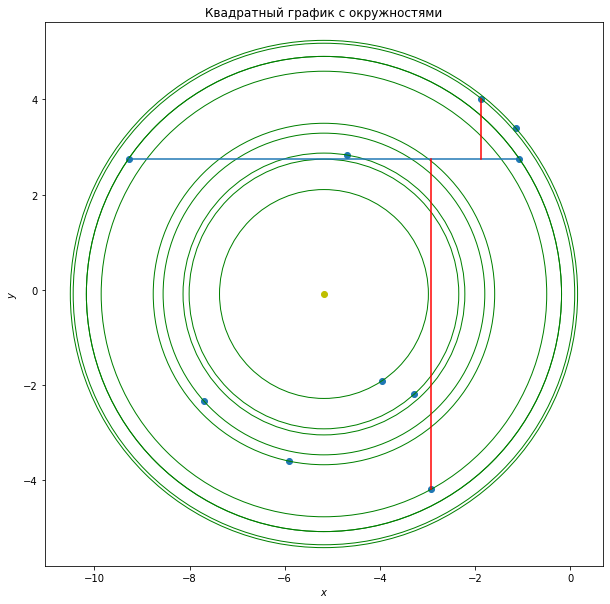

In [32]:
_= fourth_pic(s_rdata,index_max,v_index, s_segments, new_centr, mycircle_list, size = 10,
              title="Квадратный график с окружностями")

## Создание эллипса Петунина

Теперь вернем данные к виду из предыдущих шагов (обернем операцию сжатия). Получим просто повернутый набор данных. Также растянем концентричекие окружности( получим эллипсы):
- будет перенесен центр
- главной осью полученного эллипса будет диаметр окружности умноженный на коэф. растяжения
- угол полученного эллипса равен нулю (угол между осью *x* и главной осью эллипса).
- количество точек, что было внутри окружности, будет равно кол-ву точек, что попали внутрь эллипса.

При инициализации эллипса подсчитывается теоретическая оценка вероятности попадания точки внутрь эллипса по формуле
$$
    P = \frac{count}{N+1}
$$
где $count$ - количество точек, что попали внутрь эллипса, $N$ - общее количество точек. 

In [33]:
class MyEllipse:
    """
    Класс эллипсов с кол-вом точек, что попали внутрь (включая границу)
    """
    def __init__(self, xy, width, height, N, angle=0, count=0):
        self.xy = xy
        self._width = width  # буду использовать декоратор
        self._height = height # буду использовать декоратор
        self.angle = angle
        self.count = count
        self.area = self._area_calculation()

        # теоретическая оценка вероятности попадания внутрь эллипса (N - кол-во точек)
        self.prob = self.count / (N+1)

    def _area_calculation(self):
        return np.pi *self._width*self._height/4

    # Декоратор
    @property
    def width(self):
        return self._width
    # При изменении width обновится площадь
    @width.setter
    def width(self, value):
        if value <= 0:
            raise ValueError('Cannot be <=0')
        self._width = value
        self.area= self._area_calculation()
    
    @property
    def height(self):
        return self._height
    
    @height.setter
    def height(self, value):
        if value <= 0:
            raise ValueError('Cannot be <=0')
        self._height = value
        self.area= self._area_calculation()



    def __str__(self):
        return f"MyEllipse xy: {self.xy}, width: {self._width}, height: {self._height}, angle: {self.angle}, count: {self.count}, area: {self.area}, prob: {self.prob}"
    def __repr__(self):
        return f"#MyEllipse c:({self.xy[0]},{self.xy[0]}), (w/h/a:{self._width},{self._height},{self.angle}), count: {self.count}, area: {self.area}, prob: {self.prob} #"

### Создадим список эллипсов

In [34]:
myellipse_list = []
inv_koef = 1/koef
r_centr = s_rdata.T[index_max[0]] + (new_centr - s_rdata.T[index_max[0]])*np.array([inv_koef,1])
for circle in mycircle_list:
    myellipse_list.append(MyEllipse(r_centr, 2*circle.radius*inv_koef, 2*circle.radius, N,
                                    angle=0, count=circle.count))

Для наглядности выведем несколько эллипсов.

In [35]:
print(*myellipse_list[:5], sep="\n")

MyEllipse xy: [-0.65931524 -0.09169708], width: 9.22167052003514, height: 4.392055613351249, angle: 0, count: 1, area: 31.810266920684285, prob: 0.09090909090909091
MyEllipse xy: [-0.65931524 -0.09169708], width: 20.97758572600666, height: 9.991109847428543, angle: 0, count: 8, area: 164.61110102103902, prob: 0.7272727272727273
MyEllipse xy: [-0.65931524 -0.09169708], width: 22.394718194933038, height: 10.666055303513511, angle: 0, count: 10, area: 187.60279930155662, prob: 0.9090909090909091
MyEllipse xy: [-0.65931524 -0.09169708], width: 22.141310692749787, height: 10.545363522126268, angle: 0, count: 9, area: 183.38117998051501, prob: 0.8181818181818182
MyEllipse xy: [-0.65931524 -0.09169708], width: 20.97758572600666, height: 9.991109847428543, angle: 0, count: 8, area: 164.61110102103902, prob: 0.7272727272727273


### Рисунок горизонтальных эллипсов

In [36]:
def fifth_pic(rdata, index_max, v_index, segments, centr, myellipse_list, size =7, title =""):
    """
    Рисует эллипсы на повернутом рисунке
    """
    fig = third_pic(rdata, index_max, v_index, segments, size = size, title = title)
    ax = fig.axes[0]
    ax.scatter(centr[0], centr[1], color = "y")
    for ell in myellipse_list:
        ax.add_patch(ptc.Ellipse(ell.xy, ell.width, ell.height, angle = ell.angle, fill= False, color ="green"))
    return fig

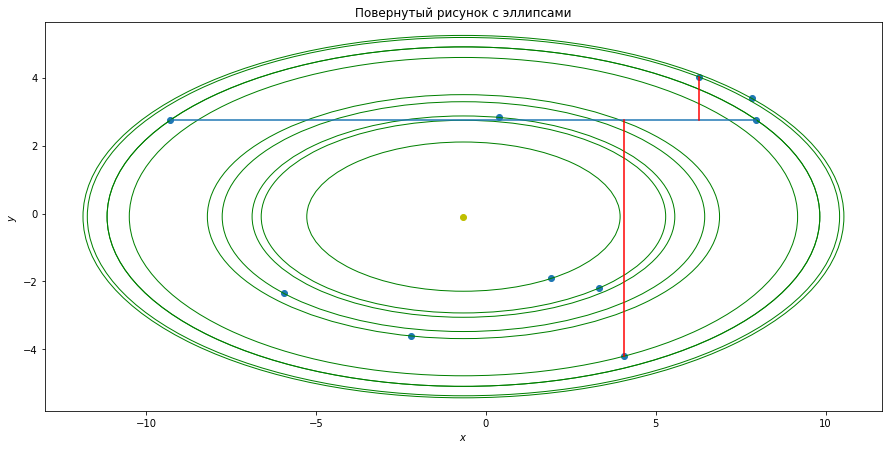

In [37]:
_= fifth_pic(rdata, index_max, v_index, segments, r_centr, myellipse_list, size =15, 
          title = "Повернутый рисунок с эллипсами")

### Эллипсы Петунина на изначальном наборе данных

Для этого изменим параметры эллипсов - поменяем угол на нужный.

In [38]:
centr = rotate_point(r_centr,data[:,index_max[0]], angle)
for ell in myellipse_list:
    ell.angle = np.degrees(angle)
    ell.xy = centr

Для наглядности выведем насколько эллипсов

In [39]:
print(*myellipse_list[:5], sep="\n")

MyEllipse xy: [[-0.75737489]
 [-0.37335761]], width: 9.22167052003514, height: 4.392055613351249, angle: -1.8820580467143326, count: 1, area: 31.810266920684285, prob: 0.09090909090909091
MyEllipse xy: [[-0.75737489]
 [-0.37335761]], width: 20.97758572600666, height: 9.991109847428543, angle: -1.8820580467143326, count: 8, area: 164.61110102103902, prob: 0.7272727272727273
MyEllipse xy: [[-0.75737489]
 [-0.37335761]], width: 22.394718194933038, height: 10.666055303513511, angle: -1.8820580467143326, count: 10, area: 187.60279930155662, prob: 0.9090909090909091
MyEllipse xy: [[-0.75737489]
 [-0.37335761]], width: 22.141310692749787, height: 10.545363522126268, angle: -1.8820580467143326, count: 9, area: 183.38117998051501, prob: 0.8181818181818182
MyEllipse xy: [[-0.75737489]
 [-0.37335761]], width: 20.97758572600666, height: 9.991109847428543, angle: -1.8820580467143326, count: 8, area: 164.61110102103902, prob: 0.7272727272727273


Изменим угол наклона перпендикуляров.

In [40]:
segments_r = []
for seg in segments:
    segments_r.append(rotate_point(seg,data[:,index_max[0]], angle))

### Рисунок со вспомогательными отрезками

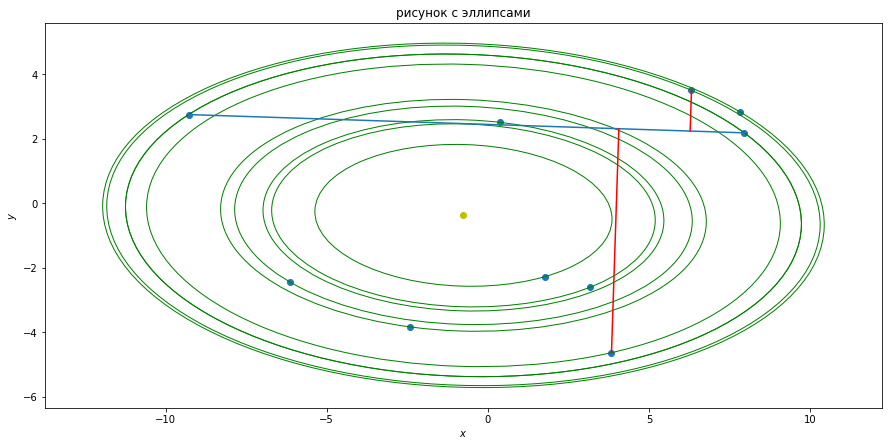

In [41]:
_= fifth_pic(data, index_max, v_index, segments_r, centr, myellipse_list, size = 15,
          title = "рисунок с эллипсами")

### Рисунок результата

In [42]:
def end_pic(data, myellipse_list, centr, size =7 ,title = ""):
    """
    Рисунок с эллипсами Петунина без вспомогательных отрезков
    """
    new_y_limits = rdata[1,v_index[0]]*1.1, rdata[1,v_index[1]]*1.1
    new_x_limits = rdata[0,index_max[0]]*1.1, rdata[0,index_max[1]]*1.1
    fig= first_pic(data, new_x_limits, new_y_limits, size , title)
    ax = fig.axes[0]
    ax.scatter(centr[0], centr[1], color = "y")
    for ell in myellipse_list:
        ax.add_patch(ptc.Ellipse(ell.xy, ell.width, ell.height, angle = ell.angle, fill= False, color ="green"))
    return fig

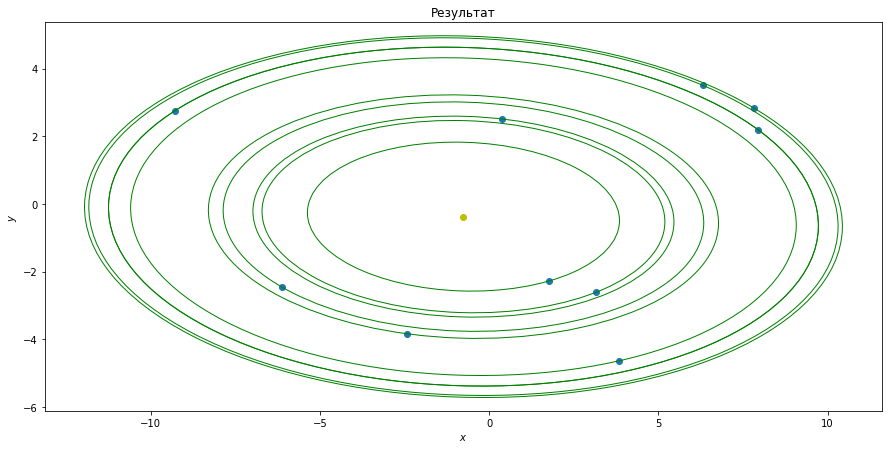

In [43]:
_= end_pic(data, myellipse_list, centr, size =15 ,title = "Результат")

### Выведем таблицу результатов

In [44]:
def print_table(myellipse_list, mycircle_list):
    
    # header
    print("|"+"|".join(["Номер точки","Радиус окружности", "Кол-во точек внутри", "Площадь эллипса", "Оценка вероятности"]))
    print("|:---"*5)
    
    for i in range(len(mycircle_list)):    
        print("|"+"|".join([str(i+1),str(mycircle_list[i].radius),str(myellipse_list[i].count),
                            str(myellipse_list[i].area),str(myellipse_list[i].prob)]))
    

In [45]:
print_table(myellipse_list, mycircle_list)

|Номер точки|Радиус окружности|Кол-во точек внутри|Площадь эллипса|Оценка вероятности
|:---|:---|:---|:---|:---
|1|2.1960278066756245|1|31.810266920684285|0.09090909090909091
|2|4.995554923714272|8|164.61110102103902|0.7272727272727273
|3|5.333027651756756|10|187.60279930155662|0.9090909090909091
|4|5.272681761063134|9|183.38117998051501|0.8181818181818182
|5|4.995554923714272|8|164.61110102103902|0.7272727272727273
|6|4.684158543694349|6|144.72875147402556|0.5454545454545454
|7|3.5898277129112266|5|85.00390068728716|0.45454545454545453
|8|2.962712091094366|3|57.89893070824419|0.2727272727272727
|9|2.8348822503949545|2|53.01047465229|0.18181818181818182
|10|3.3819594997280236|4|75.44465002666601|0.36363636363636365


|Номер точки|Радиус окружности|Кол-во точек внутри|Площадь эллипса|Оценка вероятности
|:---|:---|:---|:---|:---
|1|2.1960278066756245|1|31.810266920684285|0.09090909090909091
|2|4.995554923714272|8|164.61110102103902|0.7272727272727273
|3|5.333027651756756|10|187.60279930155662|0.9090909090909091
|4|5.272681761063134|9|183.38117998051501|0.8181818181818182
|5|4.995554923714272|8|164.61110102103902|0.7272727272727273
|6|4.684158543694349|6|144.72875147402556|0.5454545454545454
|7|3.5898277129112266|5|85.00390068728716|0.45454545454545453
|8|2.962712091094366|3|57.89893070824419|0.2727272727272727
|9|2.8348822503949545|2|53.01047465229|0.18181818181818182
|10|3.3819594997280236|4|75.44465002666601|0.36363636363636365